# 2. Feature Engineering

## Liberías

In [1]:
# Datos
import numpy as np
import pandas as pd

# Visualización
import missingno as ms
import matplotlib.pyplot as plt
import seaborn as sns

# Procesado
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

# Otros
import warnings
warnings.filterwarnings('ignore')

## Carga datos

In [2]:
df = pd.read_csv(r'..\data\processed\train_2.csv').drop(columns='id')
df.head()

,male,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad
0,1,24.443011,1.699998,81.669950,1,1,2.0,3.0,Sometimes,0,3.0,0,0.0,1.0,Sometimes,public,Overweight_Level_II
1,0,18.000000,1.560000,57.000000,1,1,2.0,3.0,Frequently,0,2.0,0,1.0,1.0,no,private,Normal_Weight
2,0,18.000000,1.711460,50.165754,1,1,2.0,1.0,Sometimes,0,2.0,0,1.0,2.0,no,public,Insufficient_Weight
3,0,20.952737,1.710730,131.274851,1,1,3.0,3.0,Sometimes,0,2.0,0,1.0,1.0,Sometimes,public,Obesity_Type_III
4,1,31.641081,1.914186,93.798055,1,1,3.0,2.0,Sometimes,0,2.0,0,2.0,1.0,Sometimes,public,Overweight_Level_II


## División en X e y

In [3]:
X = df.drop(columns='nobeyesdad')
y = df.nobeyesdad

## Plan

X:
- OHE a mtrans
- Mapeo a caec y calc
- Logaritmo a age, weight, height
- MinMaxScaler a todo

y:
- Mapeo

## Transformaciones

In [4]:
# OHE
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore', dtype=int)

encoded_mtrans = pd.DataFrame(ohe.fit_transform(X[['mtrans']]),
                             columns=ohe.get_feature_names_out(['mtrans']),
                             index=X.index)

# Elimino una de las columnas para mejorar el rendimiento
encoded_mtrans.drop(columns='mtrans_physic', inplace=True)

# Concateno
X = pd.concat([X, encoded_mtrans], axis=1).drop(columns='mtrans')



# MAPEO
X.caec = X.caec.map({'no':0,
                     'Sometimes':1,
                     'Frequently':2,
                     'Always':3})
X.calc = X.calc.map({'no':0,
                     'Sometimes':1,
                     'Frequently':2})
y = y.map({'Insufficient_Weight':0,
           'Normal_Weight':1,
           'Overweight_Level_I':2,
           'Overweight_Level_II':3,
           'Obesity_Type_I':4,
           'Obesity_Type_II':5,
           'Obesity_Type_III':6})


# LOG
X.age = np.log(X.age)
X.weight = np.log(X.weight)
X.height = np.log(X.height)


# ESCALADO
minmax = MinMaxScaler()
X = pd.DataFrame(minmax.fit_transform(X),
                 columns=X.columns,
                 index=X.index)

## Heatmap

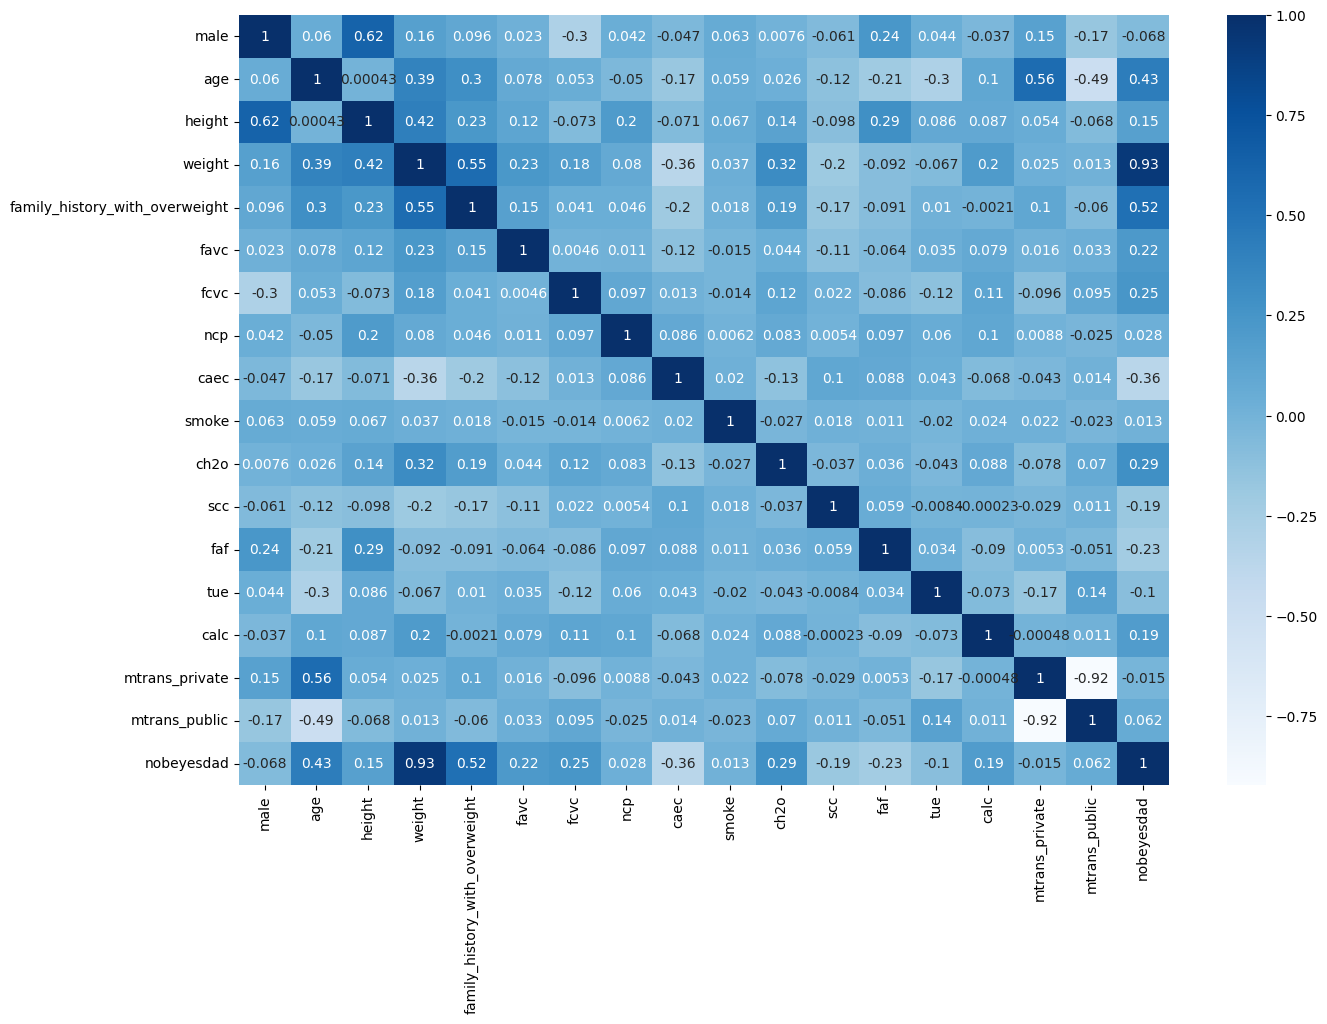

In [5]:
df = pd.concat([X, y], axis=1)

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues');

## Selección de columnas

En base al EDA y al mapa de correlación decido quedarme con las siguientes columnas:
- age
- height
- weight
- family history with overweight
- favc
- fcvc
- caec
- ch2o
- faf

In [6]:
final_df = df[['age', 'height', 'weight', 'family_history_with_overweight', 'favc', 'fcvc', 'caec', 'ch2o', 'faf', 'nobeyesdad']]

final_df.to_csv(r'..\data\processed\train_3.csv', index=False)

<hr>

<div style="display: flex; justify-content: space-between; margin-bottom: 10px;">
    <div style="text-align: left;">
        <a href="./1_EDA.ipynb">
            <button>&#8592; 1. EDA </button>
        </a>
    </div>
    <div style="text-align: right;">
        <a href="./3_Modelo_1.ipynb">
            <button>3. Modelo 1 &#8594;</button>
        </a>
    </div>
</div>

<hr>